# Capstone 2: Global Video Game Sales

In [1]:
# importing modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# loading previously cleaned dataframe

df = pd.read_csv('clean_df.csv')
df.head()

,index,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,rating,playtime,ratings_count,game_series_count,platforms
0,0,Wii Sports,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,4.19,55,174,1,Wii
1,1,Super Mario Bros.,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4.27,30,498,17,SNES||Nintendo Switch||Game Boy Advance||Game ...
2,2,Super Mario Bros.,1999.0,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07,4.27,30,498,17,SNES||Nintendo Switch||Game Boy Advance||Game ...
3,3,Mario Kart Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,4.26,12,204,10,Wii
4,4,Wii Sports Resort,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,4.17,2,89,1,Wii


# Exploratory Data Analysis

In [3]:
df.columns

Index(['index', 'Name', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'rating',
       'playtime', 'ratings_count', 'game_series_count', 'platforms'],
      dtype='object')

In [4]:
df.shape

(9462, 15)

In [5]:
df = df.drop('index', axis=1)

In [6]:
df['Global_Sales'].value_counts().sort_index()

0.01     446
0.02     431
0.03     366
0.04     297
0.05     305
        ... 
29.81      1
32.78      1
35.57      1
40.24      1
82.54      1
Name: Global_Sales, Length: 556, dtype: int64

In [7]:
df.drop(df[df['Global_Sales'] <= 0.03].index)

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,rating,playtime,ratings_count,game_series_count,platforms
0,Wii Sports,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,4.19,55,174,1,Wii
1,Super Mario Bros.,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4.27,30,498,17,SNES||Nintendo Switch||Game Boy Advance||Game ...
2,Super Mario Bros.,1999.0,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07,4.27,30,498,17,SNES||Nintendo Switch||Game Boy Advance||Game ...
3,Mario Kart Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,4.26,12,204,10,Wii
4,Wii Sports Resort,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,4.17,2,89,1,Wii
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8609,Sega Arcade Gallery,2003.0,Misc,THQ,0.03,0.01,0.00,0.00,0.04,0.00,0,0,0,Game Boy Advance
8610,100 Classic Games,2011.0,Misc,Rondomedia,0.00,0.03,0.00,0.00,0.04,0.00,0,0,0,Nintendo DS
8611,Black Stone: Magic & Steel,2003.0,Role-Playing,THQ,0.03,0.01,0.00,0.00,0.04,0.00,0,0,0,Xbox
8612,Sins of a Solar Empire: Trinity,2010.0,Strategy,Kalypso Media,0.00,0.03,0.00,0.01,0.04,2.80,1,15,0,PC


# Part I Examining Numerical Data

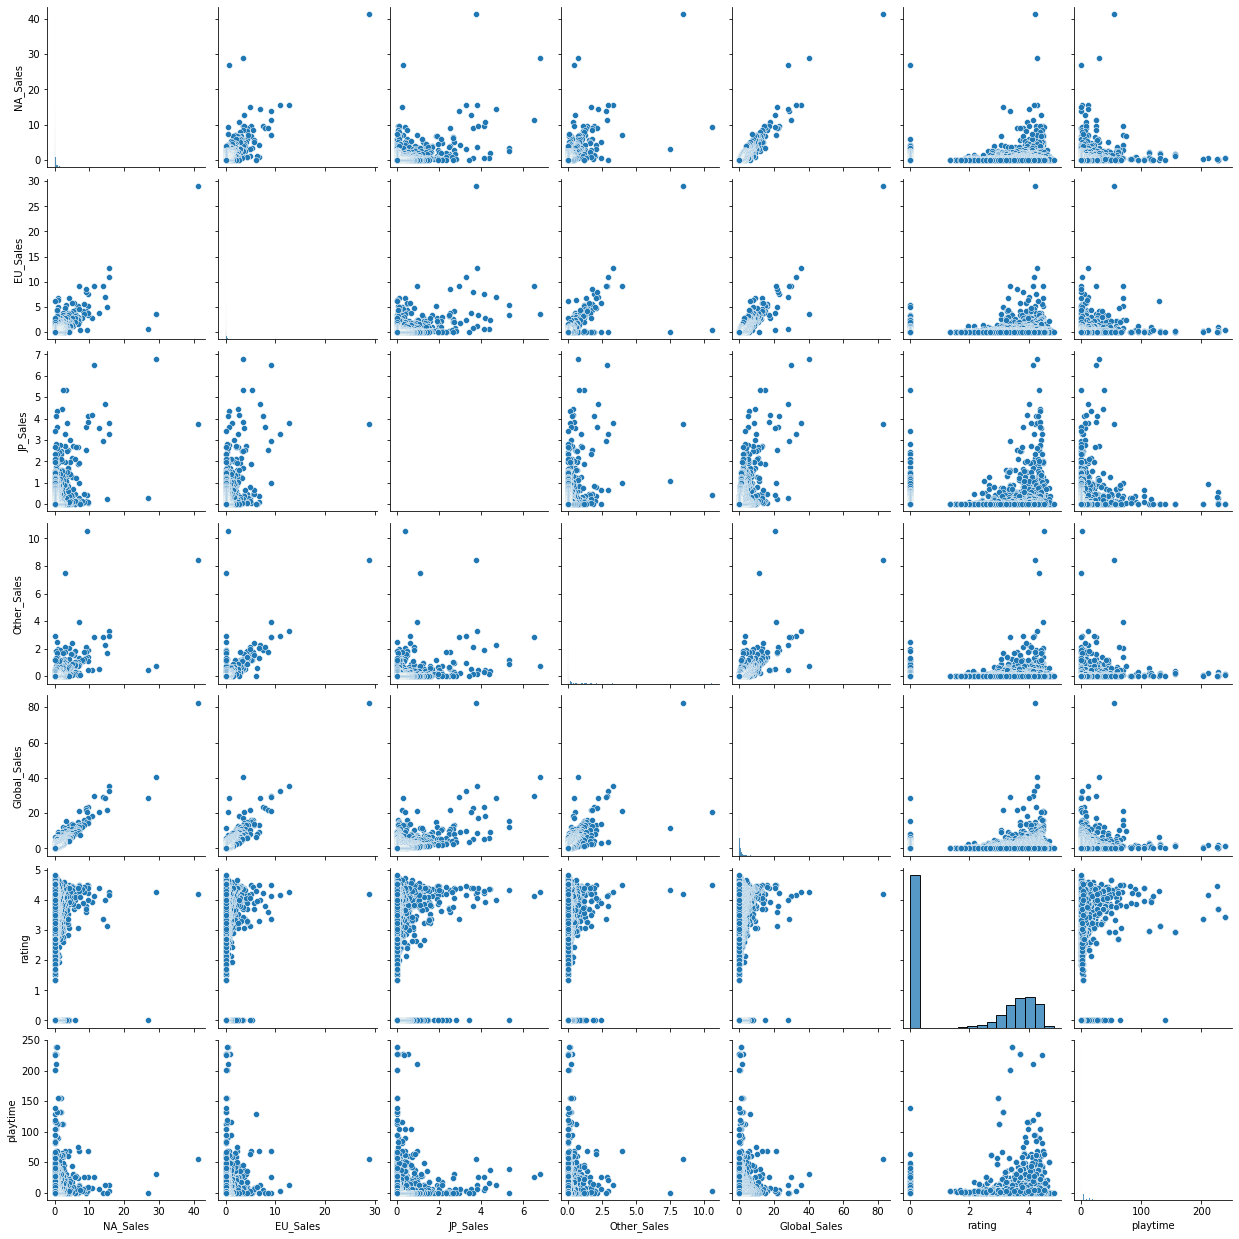

In [8]:
sns.pairplot(data=df, vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'rating', 'playtime'])
plt.show()

Observations from pairplot for numerical data: 
1. Sales between different regions have postive correlations with one another.
2. Ratings column has a lot of 0 values, indicating missing data. I can still potentially find some insight from non zero values. 
3. Playtime and rating generally have positive correlation. 

(array([5.080e+03, 0.000e+00, 4.000e+00, 1.600e+01, 1.050e+02, 2.600e+02,
        7.900e+02, 1.370e+03, 1.471e+03, 3.660e+02]),
 array([0.   , 0.483, 0.966, 1.449, 1.932, 2.415, 2.898, 3.381, 3.864,
        4.347, 4.83 ]),
 <BarContainer object of 10 artists>)

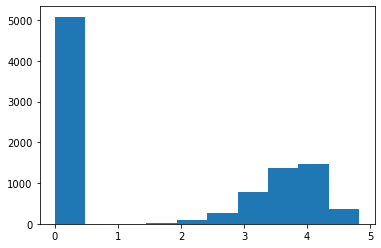

In [9]:
plt.hist(df['rating'])

In [16]:
plt.scatter(df['NA_Sales'])

TypeError: scatter() missing 1 required positional argument: 'y'

Too large of a range in values to graph histogram in sales. Perhaps 

<AxesSubplot:xlabel='Game', ylabel='Sales in millions'>

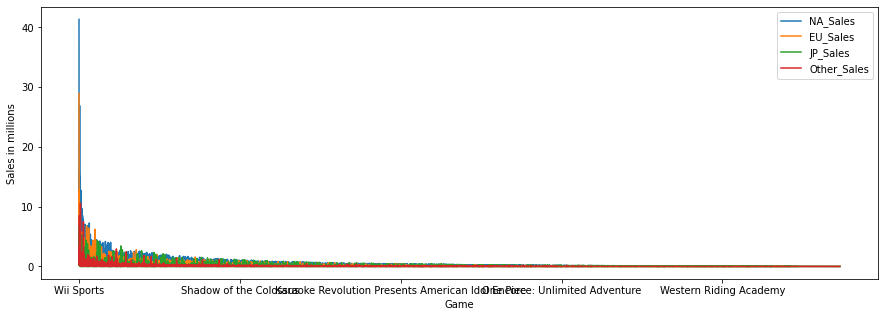

In [11]:
df.plot(x='Name', y=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], xlabel='Game', ylabel='Sales in millions', figsize=(15,5))

In [ ]:
labels = df['Genre']

Too many games to graph by sales in different regions so I will examine sales across different groups of games instead. 

In [12]:
# make hist for sales, ratings, platform 
# combined feature w platform vs publisher
# clustering KNN Kmeans 

# Part II Examining Categorical Data

In [13]:
df.head(10)

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,rating,playtime,ratings_count,game_series_count,platforms
0,Wii Sports,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,4.19,55,174,1,Wii
1,Super Mario Bros.,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4.27,30,498,17,SNES||Nintendo Switch||Game Boy Advance||Game ...
2,Super Mario Bros.,1999.0,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07,4.27,30,498,17,SNES||Nintendo Switch||Game Boy Advance||Game ...
3,Mario Kart Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,4.26,12,204,10,Wii
4,Wii Sports Resort,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,4.17,2,89,1,Wii
5,New Super Mario Bros.,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,4.13,25,179,19,Wii U||Nintendo DS
6,Wii Play,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,3.36,0,46,0,Wii
7,New Super Mario Bros. Wii,2009.0,Platform,Nintendo,14.48,6.95,4.70,2.25,28.38,3.99,12,173,17,Wii
8,Duck Hunt,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,0.00,0,0,0,PC
9,Mario Kart DS,2005.0,Racing,Nintendo,9.71,7.48,4.13,1.90,23.22,4.23,5,182,10,Nintendo DS||Wii U


In [14]:
df.nunique()

Name                 5982
Year_of_Release        42
Genre                  12
Publisher             447
NA_Sales              358
EU_Sales              282
JP_Sales              193
Other_Sales           147
Global_Sales          556
rating                246
playtime               85
ratings_count         506
game_series_count      25
platforms            1352
dtype: int64

Looking at the genre column:

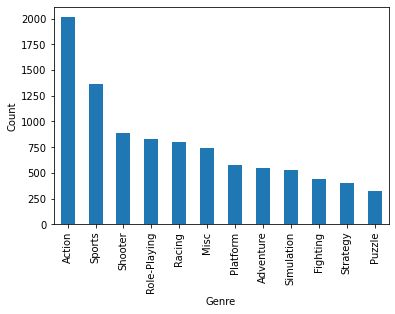

In [15]:
genre_counts = df['Genre'].value_counts()
_ = genre_counts.plot(kind='bar', xlabel='Genre', ylabel='Count')